# LSTM
### Raw data (Non time-series)
Only pi data (analysis part)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\f

In [2]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import preprocessing

In [3]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [133]:
# Data preparation
data = pd.read_csv('1h_sampled_data.csv')
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)


In [134]:
data.head()

,time,temp_pi,hum_pi,PM1_pi,PM2.5_pi,PM10_pi,temp_blue,precip,hum_blue,wind_speed,...,hum_sbs,wind,pressure,PM2.5,PM10,AQI,sunrise,noon,sunset,daylight
0,2021-03-23 10:00:00+01:00,8.316667,53.283333,6.042500,11.798333,17.710000,3.106314,0.0,76.0,5.116561,...,65.0,3.7,1025.0,16.0,24.3,59.0,2021-03-23 06:22:52.709917+01:00,2021-03-23 12:32:27+01:00,2021-03-23 18:42:36.960331+01:00,0 days 12:19:44.250414
1,2021-03-23 11:00:00+01:00,13.408333,38.358333,4.840833,10.010000,15.388333,5.416314,0.0,67.0,6.924738,...,65.0,3.7,1025.0,14.0,20.9,55.0,2021-03-23 06:22:52.709917+01:00,2021-03-23 12:32:27+01:00,2021-03-23 18:42:36.960331+01:00,0 days 12:19:44.250414
2,2021-03-23 12:00:00+01:00,17.391667,32.191667,5.140833,7.510833,9.632500,7.216313,0.0,55.0,7.421590,...,57.0,14.8,1025.0,12.0,17.3,50.0,2021-03-23 06:22:52.709917+01:00,2021-03-23 12:32:27+01:00,2021-03-23 18:42:36.960331+01:00,0 days 12:19:44.250414
3,2021-03-23 14:00:00+01:00,19.983333,28.125000,4.610000,10.042500,15.750000,9.586313,0.0,39.0,11.269782,...,40.0,11.1,1025.0,11.0,16.2,45.0,2021-03-23 06:22:52.709917+01:00,2021-03-23 12:32:27+01:00,2021-03-23 18:42:36.960331+01:00,0 days 12:19:44.250414
4,2021-03-23 15:00:00+01:00,17.625000,30.933333,4.365000,9.652500,15.223333,10.446314,0.0,37.0,9.826088,...,40.0,11.1,1025.0,10.0,15.0,41.0,2021-03-23 06:22:52.709917+01:00,2021-03-23 12:32:27+01:00,2021-03-23 18:42:36.960331+01:00,0 days 12:19:44.250414


In [135]:
data.columns

Index(['time', 'temp_pi', 'hum_pi', 'PM1_pi', 'PM2.5_pi', 'PM10_pi',
       'temp_blue', 'precip', 'hum_blue', 'wind_speed', 'wind_direction',
       'cloud_cover', 'date', 'temp_sbs', 'hum_sbs', 'wind', 'pressure',
       'PM2.5', 'PM10', 'AQI', 'sunrise', 'noon', 'sunset', 'daylight'],
      dtype='object')

In [136]:
data['time'] = pd.to_datetime(data['time'], utc=True)

In [137]:
hours = data['time'].dt.hour

In [138]:
data['hour'] = hours

In [139]:
# designate columns
x_pi = ['hour', 'temp_pi', 'hum_pi','precip', 'wind_speed', 'wind_direction','PM1_pi']
x_ext = ['hour', 'temp_blue', 'hum_blue','precip', 'wind_speed', 'wind_direction']

In [140]:
y_pi = ['PM2.5_pi', 'PM10_pi']
y_ext = ['PM2.5', 'PM10']

In [141]:
df = data[x_pi+y_pi]
df.head()

,hour,temp_pi,hum_pi,precip,wind_speed,wind_direction,PM1_pi,PM2.5_pi,PM10_pi
0,9,8.316667,53.283333,0.0,5.116561,50.710600,6.042500,11.798333,17.710000
1,10,13.408333,38.358333,0.0,6.924738,62.102737,4.840833,10.010000,15.388333
2,11,17.391667,32.191667,0.0,7.421590,67.166336,5.140833,7.510833,9.632500
3,13,19.983333,28.125000,0.0,11.269782,63.434950,4.610000,10.042500,15.750000
4,14,17.625000,30.933333,0.0,9.826088,61.557068,4.365000,9.652500,15.223333


In [142]:
df_ext = data[x_ext + y_ext] 
df_ext

,hour,temp_blue,hum_blue,precip,wind_speed,wind_direction,PM2.5,PM10
0,9,3.106314,76.0,0.0,5.116561,50.710600,16.0,24.3
1,10,5.416314,67.0,0.0,6.924738,62.102737,14.0,20.9
2,11,7.216313,55.0,0.0,7.421590,67.166336,12.0,17.3
3,13,9.586313,39.0,0.0,11.269782,63.434950,11.0,16.2
4,14,10.446314,37.0,0.0,9.826088,61.557068,10.0,15.0
...,...,...,...,...,...,...,...,...
214,21,8.796313,82.0,0.0,14.345898,287.525570,3.0,5.1
215,1,6.816314,89.0,0.3,21.434364,277.721830,3.0,4.4
216,3,4.306313,87.0,0.4,18.171976,303.690060,2.0,3.5
217,8,1.286314,93.0,1.2,16.935310,2.436646,3.0,5.6


## Pi data
### PM2.5

In [143]:
# Split train & test
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.8)]
test_df = df[int(n*0.8):]

In [144]:
labels = ['PM2.5_pi', 'PM10_pi']

In [145]:
X_train = train_df
X_train.head()

,hour,temp_pi,hum_pi,precip,wind_speed,wind_direction,PM1_pi,PM2.5_pi,PM10_pi
0,9,8.316667,53.283333,0.0,5.116561,50.710600,6.042500,11.798333,17.710000
1,10,13.408333,38.358333,0.0,6.924738,62.102737,4.840833,10.010000,15.388333
2,11,17.391667,32.191667,0.0,7.421590,67.166336,5.140833,7.510833,9.632500
3,13,19.983333,28.125000,0.0,11.269782,63.434950,4.610000,10.042500,15.750000
4,14,17.625000,30.933333,0.0,9.826088,61.557068,4.365000,9.652500,15.223333


In [146]:
y_train1 = train_df['PM2.5_pi']
y_train2 = train_df['PM10_pi']

In [147]:
y_train1 = y_train1.to_frame()
y_train2 = y_train2.to_frame()

In [148]:
X_test = test_df
X_test.head()

,hour,temp_pi,hum_pi,precip,wind_speed,wind_direction,PM1_pi,PM2.5_pi,PM10_pi
175,3,0.900000,76.941667,0.6,25.407430,277.32642,4.004167,7.480000,11.010000
176,6,0.925000,70.475000,0.0,28.894344,300.71890,3.349167,6.210000,9.105833
177,8,1.681818,67.300000,0.0,21.566973,303.42480,3.049091,5.803636,8.612727
178,10,6.133333,49.016667,0.0,26.944744,292.79650,2.535000,6.785000,11.372500
179,12,7.455556,38.100000,0.0,33.120000,270.00000,2.594444,6.646667,11.003333


In [149]:
y_true1 = test_df['PM2.5_pi']
y_true2 = test_df['PM10_pi']

y_true1 = y_true1.to_frame()
y_true2 = y_true2.to_frame()

In [150]:
X_val = val_df

y_val1 = val_df['PM2.5_pi']
y_val2 = val_df['PM10_pi']
y_val1 = y_val1.to_frame()
y_val2 = y_val2.to_frame()

### Scaling of trainset

In [151]:
# X scaling
Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(X_train)
scaled_X_train = Xscaler.transform(X_train)
print(X_train.shape)

# y1 scaling
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_train1)
scaled_y_train1 = Yscaler.transform(y_train1)
print(scaled_y_train1.shape)
scaled_y_train1 = scaled_y_train1.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_train1.shape)

# y2 scaling
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_train2)
scaled_y_train2 = Yscaler.transform(y_train2)
print(scaled_y_train2.shape)
scaled_y_train2 = scaled_y_train2.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_train2.shape)


(153, 9)
(153, 1)
(153,)
(153, 1)
(153,)


In [152]:
scaled_y_train1 = np.insert(scaled_y_train1, 0, 0)
scaled_y_train1 = np.delete(scaled_y_train1, -1)

scaled_y_train2 = np.insert(scaled_y_train2, 0, 0)
scaled_y_train2 = np.delete(scaled_y_train2, -1)

In [153]:
n_input = 4 #how many samples/rows/timesteps to look in the past in order to forecast the next sample 
n_features= X_train.shape[1] # how many predictors/Xs/features we have to predict y
b_size = 2 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train1, length=n_input, batch_size=b_size) 

print(generator[0][0].shape)

'''Question: Since the dataset is already reconstructed as 'timeseries' data, I just put 'n_input=1'. Is it reasonable?''' 

(2, 4, 9)


"Question: Since the dataset is already reconstructed as 'timeseries' data, I just put 'n_input=1'. Is it reasonable?"

### Scaling of validation set

In [154]:
scaled_X_val = Xscaler.transform(X_val)
val_generator = TimeseriesGenerator(scaled_X_val, np.zeros(len(X_val)), length=n_input, batch_size=b_size)
print(val_generator[0][0].shape)

(2, 4, 9)


In [155]:
# y_val1 scaling
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_val1)
scaled_y_val1 = Yscaler.transform(y_val1)
print(scaled_y_val1.shape)
scaled_y_val1 = scaled_y_val1.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_val1.shape)

scaled_y_val1 = np.insert(scaled_y_val1, 0, 0)
scaled_y_val1 = np.delete(scaled_y_val1, -1)

(22, 1)
(22,)


In [156]:
val_generator = TimeseriesGenerator(scaled_X_val, scaled_y_val1, length=n_input, batch_size=b_size)
print(val_generator[0][0].shape)

(2, 4, 9)


### Scaling of test set

In [157]:
# Only X required
scaled_X_test = Xscaler.transform(X_test)
test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(X_test)), length=n_input, batch_size=b_size)
print(test_generator[0][0].shape)

(2, 4, 9)


## Model

In [158]:
model = Sequential()
model.add(LSTM(256, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 256)               272384    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 272,641
Trainable params: 272,641
Non-trainable params: 0
_________________________________________________________________


In [159]:
model.fit_generator(generator,epochs=30,validation_data=val_generator)

''' Question: Since the dataset is small, I thougth the augmentation is necessary. According to the documents, 'fit_generator' is more sutiable than 'fit' if the data augementation is required. I'd like to kindly ask whether this is correct.'''

''' Question2: is the validation set correctly implemented? Still doubt it..'''

Epoch 1/30
75/75 [==============================] - 3s 38ms/step - loss: 0.0239 - val_loss: 0.1453
Epoch 2/30
75/75 [==============================] - 1s 13ms/step - loss: 0.0090 - val_loss: 0.1476
Epoch 3/30
75/75 [==============================] - 1s 13ms/step - loss: 0.0065 - val_loss: 0.1185
Epoch 4/30
75/75 [==============================] - 1s 13ms/step - loss: 0.0046 - val_loss: 0.1162
Epoch 5/30
75/75 [==============================] - 1s 13ms/step - loss: 0.0023 - val_loss: 0.1093
Epoch 6/30
75/75 [==============================] - 1s 13ms/step - loss: 0.0010 - val_loss: 0.1098
Epoch 7/30
75/75 [==============================] - 1s 14ms/step - loss: 4.7240e-04 - val_loss: 0.1024
Epoch 8/30
75/75 [==============================] - 1s 14ms/step - loss: 3.7183e-04 - val_loss: 0.1068
Epoch 9/30
75/75 [==============================] - 1s 13ms/step - loss: 2.7426e-04 - val_loss: 0.1138
Epoch 10/30
75/75 [==============================] - 1s 13ms/step - loss: 2.0074e-04 - val_loss: 

' Question2: is the validation set correctly implemented? Still doubt it..'

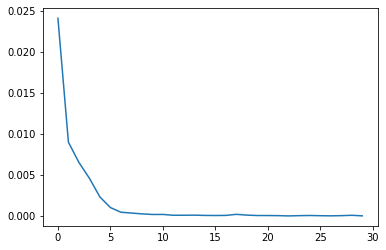

In [160]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [161]:
y_pred_scaled = model.predict(test_generator)
y_pred = Yscaler.inverse_transform(y_pred_scaled)
results = pd.DataFrame({'y_true1':test_df['PM2.5_pi'].values[n_input:],'y_pred':y_pred.ravel()})
print(results)

      y_true1    y_pred
0    6.646667  4.389475
1    6.790909  4.336746
2    6.294545  4.381094
3    5.866364  4.274987
4    6.383000  4.174687
5    5.143000  4.302691
6    3.870909  3.974622
7    4.199091  3.647137
8    5.189167  3.718204
9    5.742857  3.982249
10   4.067000  4.122930
11   7.761667  3.730245
12   8.873333  4.570998
13   5.002727  4.919225
14   8.486250  3.999902
15   6.048000  4.822785
16   3.444545  4.192320
17   4.010000  3.537400
18   8.113333  3.674547
19   7.712500  4.666910
20   5.928333  4.624276
21   8.453333  4.203596
22   7.355833  4.823818
23   6.587500  4.563252
24   7.347500  4.372994
25   5.099091  4.569851
26   6.965833  3.991580
27  12.271667  4.483065
28  10.702500  5.884285
29   5.878000  5.487572
30   4.895833  4.169468
31   5.475556  3.890437
32   6.539167  4.068835
33   5.445000  4.330214
34   3.640000  4.033817
35   4.924000  3.552456
36   4.356667  3.899858
37   5.618333  3.740387
38   6.740000  4.083894
39   6.495000  4.421338


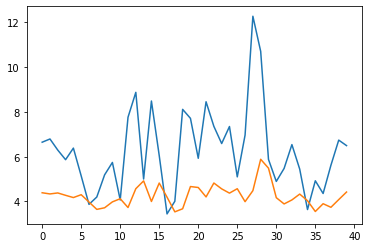

In [162]:
plt.plot(results)

In [163]:
# LSTM 256 / epochs = 30 (default)
# Time steps = 4 / Batch size = 2
# Including PM from X
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))

MSE:  6.860517574722159
MAE:  2.0588333099267526


In [80]:
# LSTM 256 / epochs = 30 (default)
# Time steps = 3 / Batch size = 2
# Excluding PM from X
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))

MSE:  7.295556859505828
MAE:  2.1365272526493686


In [112]:
# LSTM 256 / epochs = 30 (default)
# Time steps = 3 / Batch size = 2
# Excluding PM from X
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))

MSE:  5.922937619494131
MAE:  1.9006601848464677


In [131]:
# LSTM 256 / epochs = 30 (default)
# Time steps = 3 / Batch size = 2
# Including PM from X
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))

MSE:  7.047717796611782
MAE:  2.1085981806683
